In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
cdf = pd.read_csv(r"C:\Users\shnek\Downloads\covid_19_clean_complete\covid_19_clean_complete.csv")

In [3]:
cdf

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [5]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [6]:
cdf.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [8]:
cdf['Date'] = pd.to_datetime(cdf['Date'])

In [9]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [10]:
cdf.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [11]:
cdf['Province/State'].fillna("Unknown", inplace=True)

In [12]:
cdf.isnull().sum()

Province/State    0
Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
WHO Region        0
dtype: int64

In [16]:
# Aggregating data by 'Country/Region' and 'Date'
aggregated_data = cdf.groupby(['Country/Region', 'Date']).agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum',
    'Active': 'sum'
}).reset_index()

aggregated_data.tail()

,Country/Region,Date,Confirmed,Deaths,Recovered,Active
35151,Zimbabwe,2020-07-23,2124,28,510,1586
35152,Zimbabwe,2020-07-24,2296,32,514,1750
35153,Zimbabwe,2020-07-25,2434,34,518,1882
35154,Zimbabwe,2020-07-26,2512,34,518,1960
35155,Zimbabwe,2020-07-27,2704,36,542,2126


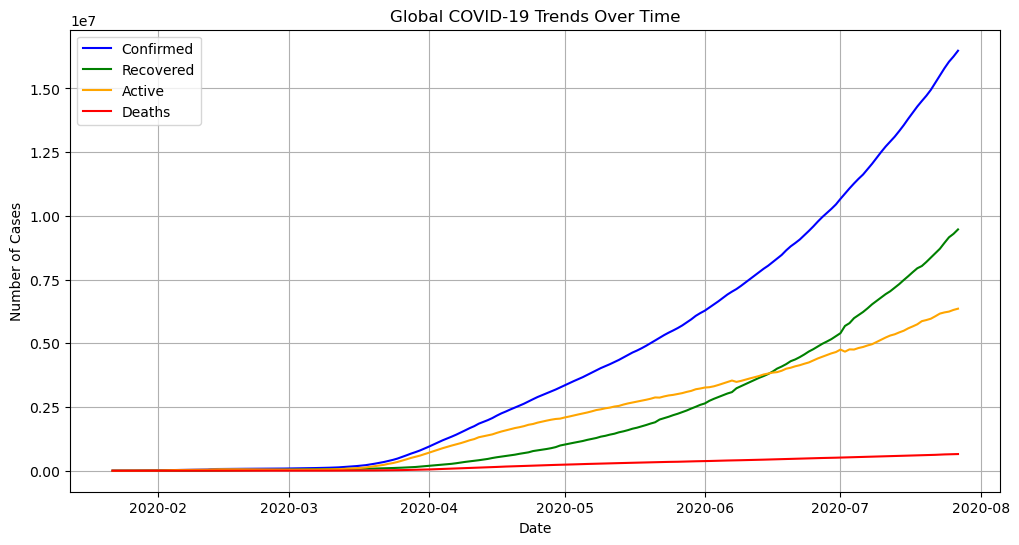

In [17]:
# Analyzing global trends by date
global_trends = aggregated_data.groupby('Date')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum()

# Plotting global trends

plt.figure(figsize=(12, 6))
plt.plot(global_trends.index, global_trends['Confirmed'], label='Confirmed', color='blue')
plt.plot(global_trends.index, global_trends['Recovered'], label='Recovered', color='green')
plt.plot(global_trends.index, global_trends['Active'], label='Active', color='orange')
plt.plot(global_trends.index, global_trends['Deaths'], label='Deaths', color='red')
plt.title('Global COVID-19 Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid()
plt.show()


In [20]:
# Finding top 5 countries with the highest total confirmed cases
top_countries = aggregated_data.groupby('Country/Region')['Confirmed'].max().sort_values(ascending=False).head(5)
print("Top 5 Countries:\n", top_countries)

Top 5 Countries:
 Country/Region
US              4290259
Brazil          2442375
India           1480073
Russia           816680
South Africa     452529
Name: Confirmed, dtype: int64


In [21]:
# Data for Prophet
prophet_data = global_trends.reset_index()[['Date', 'Confirmed']]
prophet_data.columns = ['ds', 'y']  

In [24]:
from prophet import Prophet

# Initializing the Prophet model
model = Prophet()
model.fit(prophet_data)

# Creating a dataframe for future predictions (7 days ahead)
future = model.make_future_dataframe(periods=7)
forecast = model.predict(future)

16:40:01 - cmdstanpy - INFO - Chain [1] start processing
16:40:01 - cmdstanpy - INFO - Chain [1] done processing


In [23]:
!pip install prophet

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/13.3 MB 1.7 MB/s eta 0:00:09
    --------------------------------------- 0.2/13.3 MB 2.2 MB/s eta 0:00:07
   - -------------------------------------- 0.4/13.3 MB 2.8 MB/s eta 0:00:05
   - -------------------------------------- 0.5/13.3 MB 2.5 MB/s eta 0:00:06
   - -------------------------------------- 0.6/13.3 MB 2.7 MB/s eta 0:00:05
   -- ------------------------------------- 0.7/13.3 MB 2.7 MB/s eta 0:00:05
   -- ------------------------------------- 0.9/13.3 MB 2.7 MB/s eta 0:00:05
   --- ------------------------------------ 1.1/13.3 MB 2.9 MB/s eta 0:00:05
   --- ------------------------------------ 1.2/13.3 MB 2.9 MB/s eta 0:00:05
   ---- ----------------------------------- 1.4/13.3 MB 2.9 MB/s eta 0:00:05
   ---- ----------------------------------- 1.5/13.3 MB 3.0 MB/s eta 0:00:04
   ----- ---------------------------------- 1.7/13.3 MB 3.1 MB/s eta 0:00:04
   ---

C:\Users\shnek\AppData\Local\Temp\ipykernel_4388\2071730662.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


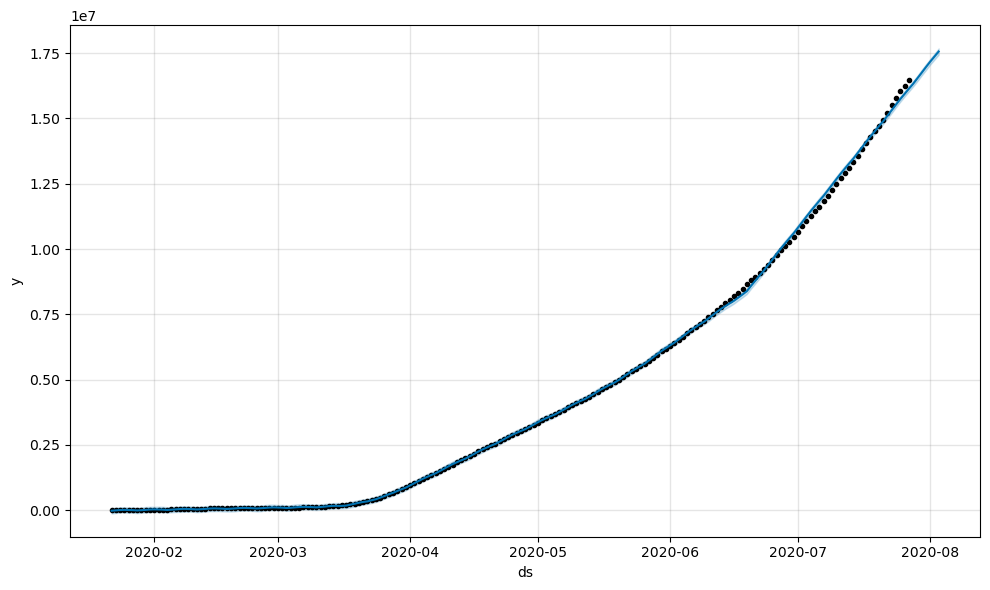

In [25]:
# Plotting the forecast (Future Prediction)
fig = model.plot(forecast)
fig.show()

### Future Prediction of Covid 19

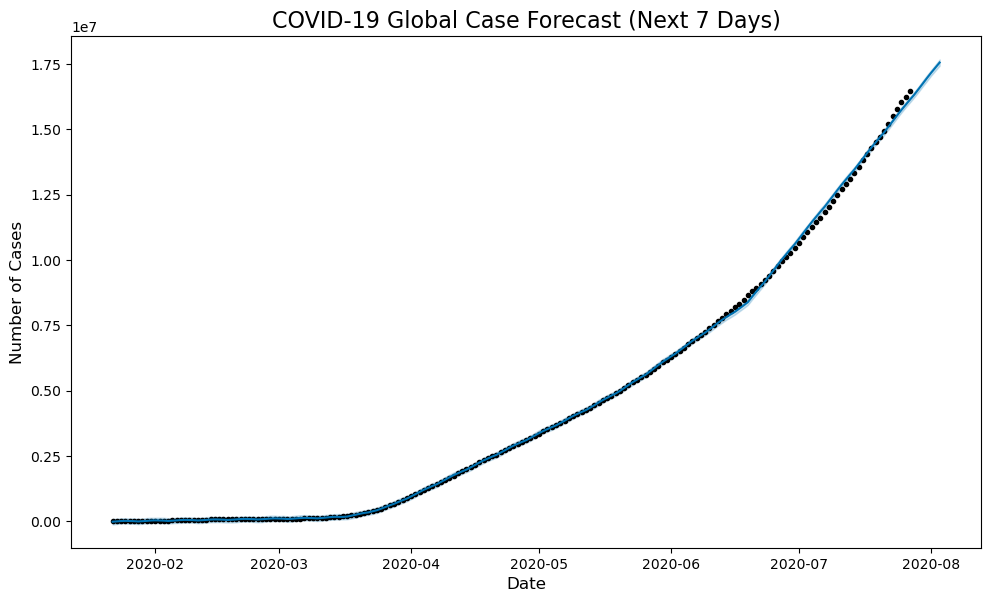

In [28]:
import matplotlib.pyplot as plt
from prophet.plot import plot_plotly

fig = model.plot(forecast)

ax = fig.gca()  
ax.set_title('COVID-19 Global Case Forecast (Next 7 Days)', fontsize=16)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Number of Cases', fontsize=12)

plt.grid()
plt.show()

plotly_fig = plot_plotly(model, forecast)
plotly_fig.update_layout(
    title="Interactive Forecast of COVID-19 Global Cases",
    xaxis_title="Date",
    yaxis_title="Number of Cases",
    legend_title="Legend"
)
plotly_fig.show()